In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.nn import MSELoss
import time

from laser_jitter.data import TimeSeries, TimeSeriesSTFT

In [2]:
N = 5
smooth_params = {
    'kernel': np.ones(N)/N,
}

data = pd.read_csv("/home/wi73yus/focus_deviation/data/cryo07_decFULL.csv", header=None)
data = data.rename({0: 'real_time', 1:'focus_location'}, axis=1)
data['time_idx'] = np.arange(len(data['real_time']))

ts_data = np.array(data['focus_location'])

### TimeSeries

In [3]:
ts = TimeSeries(ts_data[:10000], smooth_params=smooth_params, train_size=0.8)

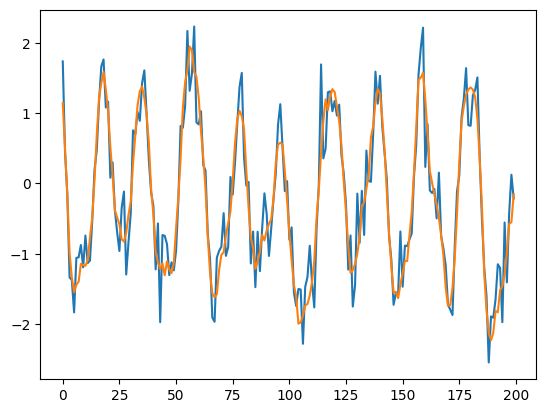

In [4]:
idx = 200
plt.figure()
plt.plot(ts.test[:idx])
plt.plot(ts.test_smooth[:idx])
plt.show()

In [5]:
sequence_params = {
    'training_window': 200,
    'prediction_window': 100,
    'step': 1
}

dataloader_params = {
    'batch_size': 64,
    'shuffle': False,
    'drop_last': False,
}


loaders = ts.create_dataloaders(ts.train, ts.test, sequence_params, dataloader_params)
trainloader, testloader = loaders
loaders_smooth = ts.create_dataloaders(ts.train_smooth, ts.test_smooth, sequence_params,
                                       dataloader_params)
trainloader_smooth, testloader_smooth = loaders_smooth

In [6]:
for (x,y), (x_smooth, y_smooth) in zip(trainloader, trainloader_smooth):
    print(x.shape, y.shape)
    break

torch.Size([64, 200, 1]) torch.Size([64, 100, 1])


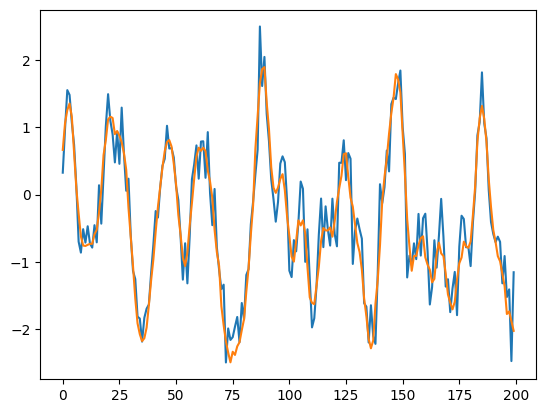

In [7]:
i = 50
idx = 200
plt.figure()
plt.plot(x[i,:idx])
plt.plot(x_smooth[i,:idx])
plt.show()

### TimeSeriesSTFT

In [8]:
stft_params = {
    'nperseg': 500, # window_length
    'fs': 1e3,
    'boundary': None,
    'noverlap': 499,
    'padded': False,
    'window': 'tukey'
}

filter_params = {
    'thresh_weight': 1,
    'freq_low': 0
}

ts = TimeSeriesSTFT(ts_data[:10000], stft_params, train_size=0.8, filter_params=filter_params)

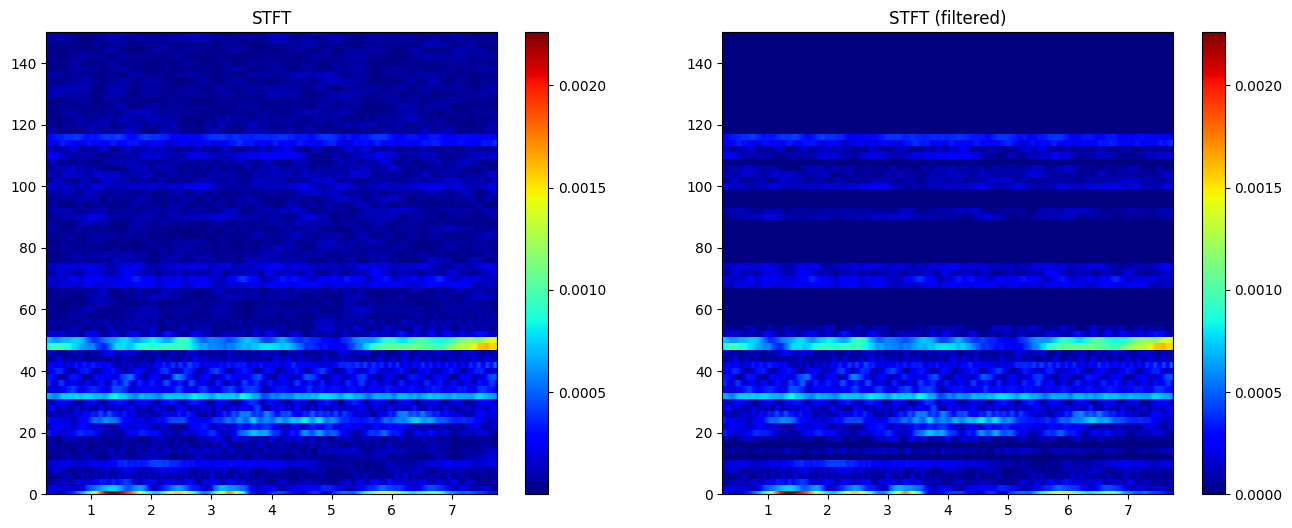

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.pcolormesh(ts.t, ts.freq, np.abs(ts.train_stft), cmap='jet')
plt.colorbar()
plt.ylim([0,150])
plt.title('STFT')


plt.subplot(122)
plt.pcolormesh(ts.t, ts.freq, np.abs(ts.train_stft_filt), cmap='jet')
plt.colorbar()
plt.ylim([0,150])
plt.title('STFT (filtered)')
plt.show()

In [10]:
sequence_params = {
    'training_window': 200,
    'prediction_window': 100,
    'step': 1
}

dataloader_params = {
    'batch_size': 64,
    'shuffle': False,
    'drop_last': False,
}


loaders = ts.create_dataloaders(ts.train_real, ts.train_imag, ts.test_real, ts.test_imag,
                                sequence_params, dataloader_params)
trainloader, testloader = loaders

In [11]:
for x,y in trainloader:
    print(x.shape, y.shape)
    break

torch.Size([64, 200, 80]) torch.Size([64, 100, 80])
